<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="300" alt="Skills Network Logo">
    </a>
</p>


# Test Environment for Generative AI classroom labs

This lab provides a test environment for the codes generated using the Generative AI classroom.

Follow the instructions below to set up this environment for further use.


# Setup


### Install required libraries

In case of a requirement of installing certain python libraries for use in your task, you may do so as shown below.


In [9]:
%pip install seaborn
import piplite

await piplite.install(['nbformat', 'plotly'])

In [12]:
%pip install scipy

### Dataset URL from the GenAI lab
Use the URL provided in the GenAI lab in the cell below. 


In [2]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-AI0271EN-SkillsNetwork/labs/v1/m3/data/used_car_price_analysis.csv"

### Downloading the dataset

Execute the following code to download the dataset in to the interface.

> Please note that this step is essential in JupyterLite. If you are using a downloaded version of this notebook and running it on JupyterLabs, then you can skip this step and directly use the URL in pandas.read_csv() function to read the dataset as a dataframe


In [3]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

path = URL

await download(path, "dataset4.csv")

---


# Test Environment


In [14]:
# Keep appending the code generated to this cell, or add more cells below this to execute in parts
# Importing pandas library
import pandas as pd

# Define the file path
file_path = 'dataset4.csv'  # Replace with your actual file path

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path, header=0)  # Header=0 indicates that the first row of the CSV is the header

# Display the DataFrame
print(df.head())  # Print the first 5 rows to verify the data

     model  year transmission  mileage fuelType    tax   mpg  engineSize  \
0   Fiesta  2017    Automatic    15944   Petrol  150.0  57.7         1.0   
1    Focus  2018       Manual     9083   Petrol  150.0  57.7         1.0   
2    Focus  2017       Manual    12456   Petrol  150.0  57.7         1.0   
3   Fiesta  2019       Manual    10460   Petrol  145.0  40.3         1.5   
4   Fiesta  2019    Automatic     1482   Petrol  145.0  48.7         1.0   

   price  
0  12000  
1  14000  
2  13000  
3  17500  
4  16500  


## Data Preparation

### Data Cleaning

In [15]:
# 1. Identify columns with missing values
missing_cols = df.columns[df.isnull().any()].tolist()
print(f"Columns with missing values: {missing_cols}")

# 2. Replace missing values with the mean of the respective column
for col in missing_cols:
    if pd.api.types.is_numeric_dtype(df[col]):  # Ensure column is numeric
        mean_value = df[col].mean()
        df[col].fillna(mean_value, inplace=True)
        print(f"Filled missing values in '{col}' with mean value: {mean_value}")

# 3. Delete duplicate rows
initial_shape = df.shape
df.drop_duplicates(inplace=True)
final_shape = df.shape

print(f"Removed {initial_shape[0] - final_shape[0]} duplicate rows.")
print(f"Final DataFrame shape: {final_shape}")


Columns with missing values: ['tax']


<ipython-input-15-b3929160caa0>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mean_value, inplace=True)


Filled missing values in 'tax' with mean value: 113.3291766408729
Removed 154 duplicate rows.
Final DataFrame shape: (17812, 9)


## Data insights and Visualisation

In [16]:
# 1. Identify the 5 attributes that have the highest correlation with the price parameter.
# Set your target column here
target_column = 'price'

# 1. Calculate correlation matrix (only numeric columns)
correlation_matrix = df.corr(numeric_only=True)

# 2. Get correlations with the target column, sort them in descending order
target_correlation = correlation_matrix[target_column].drop(target_column).sort_values(ascending=False)

# 3. Select top 5 attributes
top_5_attributes = target_correlation.head(5)

# Display the result
print("Top 5 attributes with highest correlation to '{}':".format(target_column))
print(top_5_attributes)


Top 5 attributes with highest correlation to 'price':
year          0.635715
engineSize    0.411451
tax           0.405970
mpg          -0.346263
mileage      -0.530483
Name: price, dtype: float64


In [17]:
# 2. Count the number of cars under each unique value of fuelType attribute.
# Count number of cars under each unique 'fuelType'
fuel_type_counts = df['fuelType'].value_counts()

# Display the result
print("Number of cars under each unique 'fuelType':")
print(fuel_type_counts)


Number of cars under each unique 'fuelType':
fuelType
Petrol      12081
Diesel       5706
Hybrid         22
Electric        2
Other           1
Name: count, dtype: int64


<ipython-input-18-5b8ea70bed1d>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='transmission', y='price', palette='Set2')


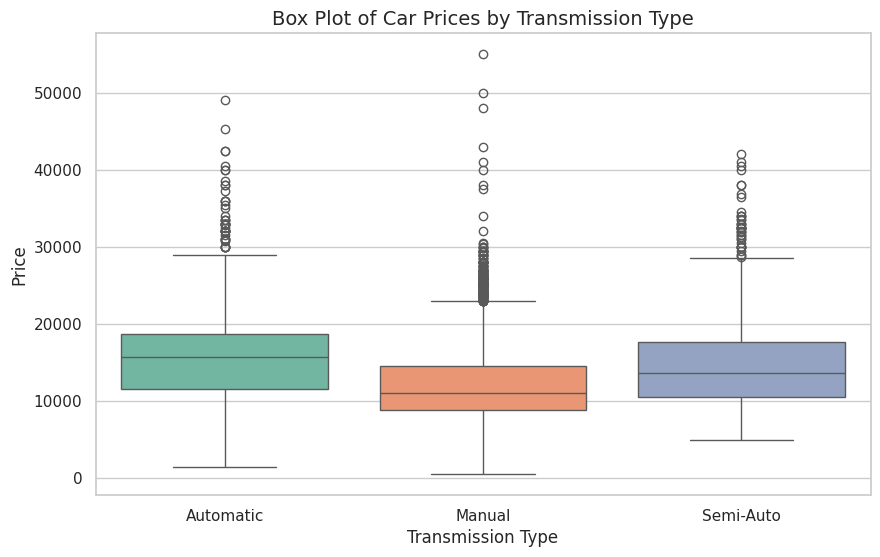

In [18]:
# Create a Box plot to determine whether cars with automatic, manual or semi-auto type of transmission have more price outliers. Use the Seaborn library 
# for creating the plot.
import seaborn as sns
import matplotlib.pyplot as plt

# Set the plot style for better appearance
sns.set(style="whitegrid")

# Create the box plot for 'price' vs 'transmission'
plt.figure(figsize=(10, 6))  # Set figure size
sns.boxplot(data=df, x='transmission', y='price', palette='Set2')

# Set plot title and labels
plt.title('Box Plot of Car Prices by Transmission Type', fontsize=14)
plt.xlabel('Transmission Type', fontsize=12)
plt.ylabel('Price', fontsize=12)

# Show the plot
plt.show()


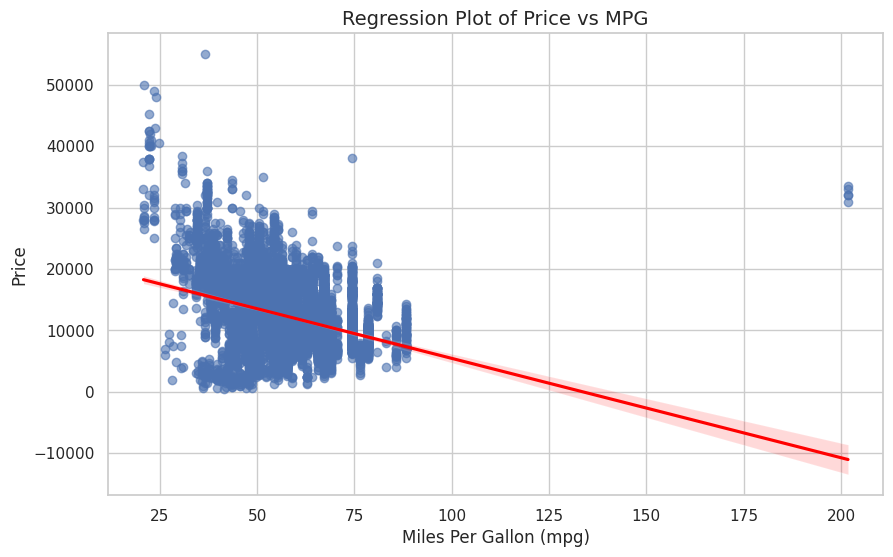

In [21]:
# 4. Generate the regression plot between mpg parameter and the price to determine the correlation type between the two.
# Set the plot style
sns.set(style="whitegrid")

# Create a regression plot for 'mpg' vs 'price'
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='mpg', y='price', scatter_kws={'alpha':0.6}, line_kws={'color':'red'})

# Add plot title and labels
plt.title('Regression Plot of Price vs MPG', fontsize=14)
plt.xlabel('Miles Per Gallon (mpg)', fontsize=12)
plt.ylabel('Price', fontsize=12)

# Show the plot
plt.show()

In [22]:
# Calculate Pearson correlation
correlation = df['mpg'].corr(df['price'])
print(f"Correlation between mpg and price: {correlation:.2f}")

Correlation between mpg and price: -0.35


## Model Development and Evaluation

In [23]:
# 1. Fit a linear regression model to predict the price using the feature mpg. Then calculate the R^2 and MSE values for the model.
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Assuming your DataFrame is called df and it has been cleaned of missing values

# Define feature and target
X = df[['mpg']]  # Feature must be 2D
y = df['price']  # Target

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate R² score
r2 = r2_score(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Print results
print(f"R² score: {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")

R² score: 0.1504
Mean Squared Error (MSE): 19049855.14


In [27]:
# Fit a linear regression model to predict the price using the following set of features.
# year, mileage, tax, mpg and engineSize.
# Calculate the R^2 and MSE values for this model.

# Define the features and target
features = ['year', 'mileage', 'tax', 'mpg', 'engineSize']
X = df[features]  # Independent variables
y = df['price']  # Dependent variable (target)

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict prices on the test set
y_pred = model.predict(X_test)

# Calculate R^2 score
r2 = r2_score(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Print the performance metrics
print(f"R² score: {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")

R² score: 0.6917
Mean Squared Error (MSE): 6912744.91


In [26]:
# 3. For the same set of features as in the question above, create a pipeline model object that uses standard scalar, second degree polynomial features 
# and a linear regression model. Calculate the R^2 value and the MSE value for this model.
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline

# Assuming df is your cleaned DataFrame

# Define the features and target
features = ['year', 'mileage', 'tax', 'mpg', 'engineSize']
X = df[features]  # Independent variables
y = df['price']  # Dependent variable (target)

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),             # Standardize the data
    ('poly', PolynomialFeatures(degree=2)),   # Add second-degree polynomial features
    ('regressor', LinearRegression())         # Apply Linear Regression
])

# Train the model using the pipeline
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Calculate R^2 score
r2 = r2_score(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Print the performance metrics
print(f"R² score: {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")

R² score: 0.1212
Mean Squared Error (MSE): 19704749.61


In [28]:
#4. For the same set of features, split the data into training and testing data parts. Assume testing part to be 20%. Create and fit a Ridge 
# regression object using the training data, set the regularization parameter to 0.1, and calculate the R^2 using the test data.
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

# Assuming X is the feature matrix and y is the target variable (price)

# Step 1: Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Create a Ridge regression model with regularization parameter alpha=0.1
ridge_model = Ridge(alpha=0.1)

# Step 3: Fit the model on the training data
ridge_model.fit(X_train, y_train)

# Step 4: Predict on the test data
y_pred = ridge_model.predict(X_test)

# Step 5: Calculate R^2 on the test data
r2 = r2_score(y_test, y_pred)

print(f"R² for Ridge regression with alpha=0.1: {r2:.4f}")

R² for Ridge regression with alpha=0.1: 0.6917


In [29]:
# 5. Perform a second order polynomial transform on both the training data and testing data created for the question above. Create and fit a 
# Ridge regression object using the modified training data, set the regularisation parameter to 0.1, and calculate the R^2 and MSE utilising the 
# modified test data.
# Import necessary libraries
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# Step 1: Apply second-order polynomial transformation to both training and testing data
poly = PolynomialFeatures(degree=2)  # Second-order polynomial features

# Transform the training and test data
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Step 2: Create a Ridge regression model with alpha=0.1
ridge_model_poly = Ridge(alpha=0.1)

# Step 3: Fit the Ridge model to the transformed training data
ridge_model_poly.fit(X_train_poly, y_train)

# Step 4: Predict the target on the transformed test data
y_pred_poly = ridge_model_poly.predict(X_test_poly)

# Step 5: Calculate R^2 on the test data
r2_poly = ridge_model_poly.score(X_test_poly, y_test)

# Step 6: Calculate MSE (Mean Squared Error) on the test data
mse_poly = mean_squared_error(y_test, y_pred_poly)

# Print the results
print(f"R² for Ridge regression with polynomial features: {r2_poly:.4f}")
print(f"MSE for Ridge regression with polynomial features: {mse_poly:.4f}")

/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.17676e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


R² for Ridge regression with polynomial features: 0.6733
MSE for Ridge regression with polynomial features: 7326174.5166


In [30]:
# 6. In the question above, perform a Grid Search on ridge regression for a set of values of alpha {0.01, 0.1, 1, 10, 100} with 4-fold cross 
# validation to find the optimum value of alpha to be used for the prediction model.

# Import necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Step 1: Define the parameter grid for alpha values
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Step 2: Set up Ridge regression model
ridge_model = Ridge()

# Step 3: Set up GridSearchCV with 4-fold cross-validation
grid_search = GridSearchCV(estimator=ridge_model, param_grid=param_grid, cv=4, scoring='neg_mean_squared_error')

# Step 4: Perform grid search using the training data (X_train_poly transformed into polynomial features)
grid_search.fit(X_train_poly, y_train)

# Step 5: Get the best alpha from grid search
best_alpha = grid_search.best_params_['alpha']

# Step 6: Fit the model using the best alpha
best_ridge_model = Ridge(alpha=best_alpha)
best_ridge_model.fit(X_train_poly, y_train)

# Step 7: Predict using the test data
y_pred_best = best_ridge_model.predict(X_test_poly)

# Step 8: Calculate R² and MSE for the best model on the test data
r2_best = best_ridge_model.score(X_test_poly, y_test)
mse_best = mean_squared_error(y_test, y_pred_best)

# Step 9: Output the results
print(f"Best alpha from GridSearch: {best_alpha}")
print(f"R² for Ridge regression with optimal alpha: {r2_best:.4f}")
print(f"MSE for Ridge regression with optimal alpha: {mse_best:.4f}")


/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.93807e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.88233e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=3.01744e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.78199e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.93807e-24): res

Best alpha from GridSearch: 0.01
R² for Ridge regression with optimal alpha: 0.3827
MSE for Ridge regression with optimal alpha: 13840985.1176


## Authors


[Abhishek Gagneja](https://www.linkedin.com/in/abhishek-gagneja-23051987/)


## Change Log


|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2023-12-10|0.1|Abhishek Gagneja|Initial Draft created|


Copyright © 2023 IBM Corporation. All rights reserved.
